In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
def plotVals(ds, *ycols, title='', xcol='data'):
    """
    ds: dataset
    yCols: colonne da graficare
    """
    xvals = [datetime.strptime(d, '%Y-%m-%dT%H:%M:%S') for d in ds[xcol]]
    plt.figure(figsize=(20,10))
    ax = plt.subplot()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

    for col in ycols:
        ax.plot(xvals, ds[col], marker='o', linestyle='--', label=col)
    
    plt.title(title)
    ax.legend()
    plt.show()

In [3]:
def plotIncrements(ds, ycol, title='', N=5, xcol='data'):
    xvals = [datetime.strptime(d, '%Y-%m-%dT%H:%M:%S') for d in ds[xcol]]
    plt.figure(figsize=(20,10))
    ax = plt.subplot()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

    ys = list(ds[ycol])
    incr = [ys[i] - ys[i-1] for i in range(1, len(ys))]
    
    #Media mobile
    mns = list()
    for i in range(N-1, len(incr)):
        s = 0
        for j in range(i-N+1, i+1):
            s += incr[j] 
        mns.append(s/N)
    
    ax.plot(xvals[1:], incr, marker='o', linestyle='--', label="Raw data")
    ax.plot(xvals[N:], mns, marker='o', linestyle='-', label="Media mobile")
            
    plt.title(title)
    ax.legend()
    plt.show()


# Italia

In [4]:
fileUrl = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
ds = pd.read_csv(fileUrl)

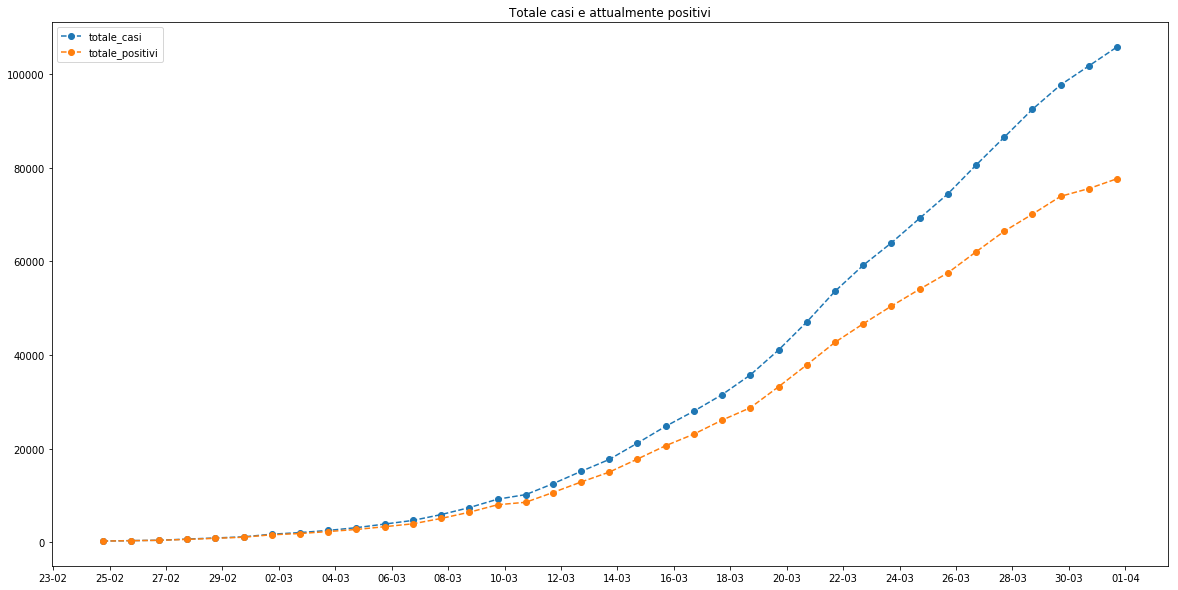

In [5]:
plotVals(ds, 'totale_casi', 'totale_positivi', title='Totale casi e attualmente positivi')

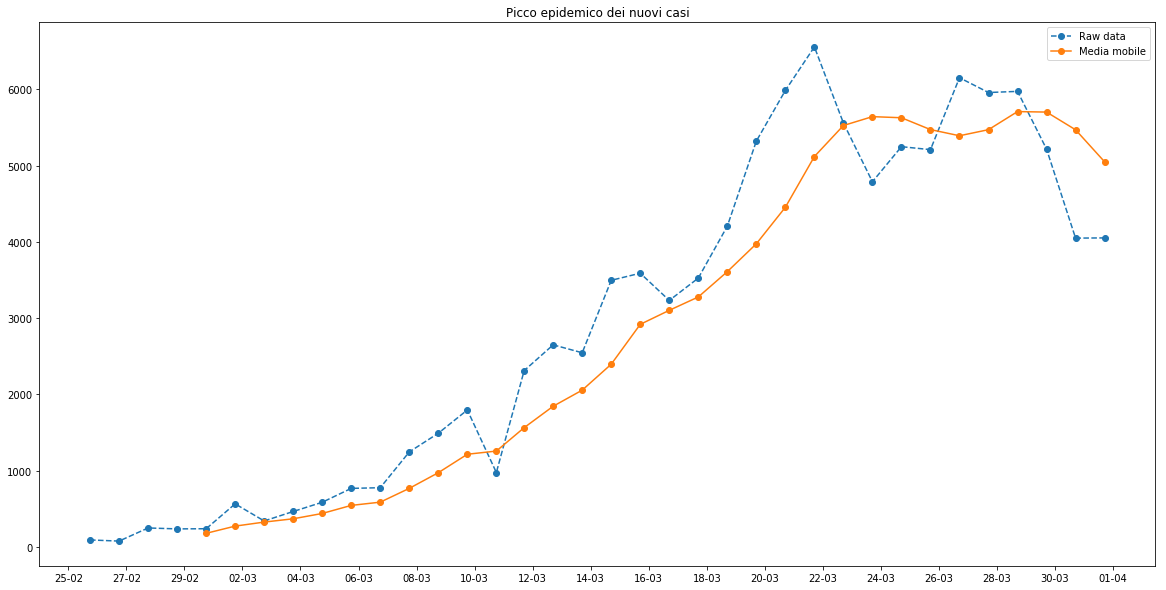

In [6]:
plotIncrements(ds, 'totale_casi', 'Picco epidemico dei nuovi casi')   

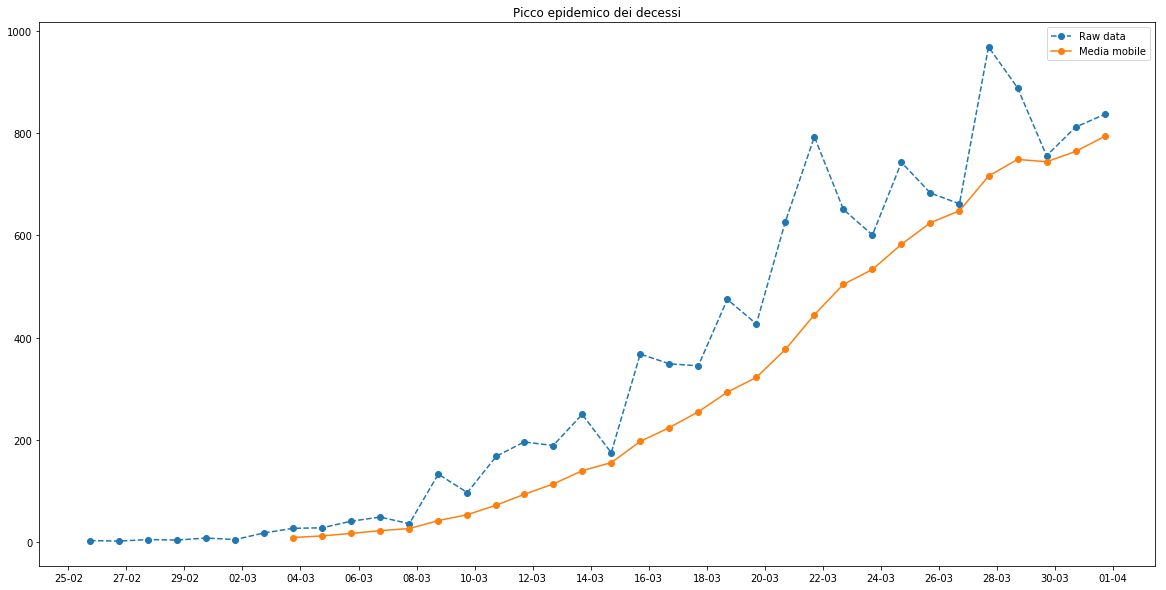

In [7]:
plotIncrements(ds, 'deceduti', 'Picco epidemico dei decessi', 8)

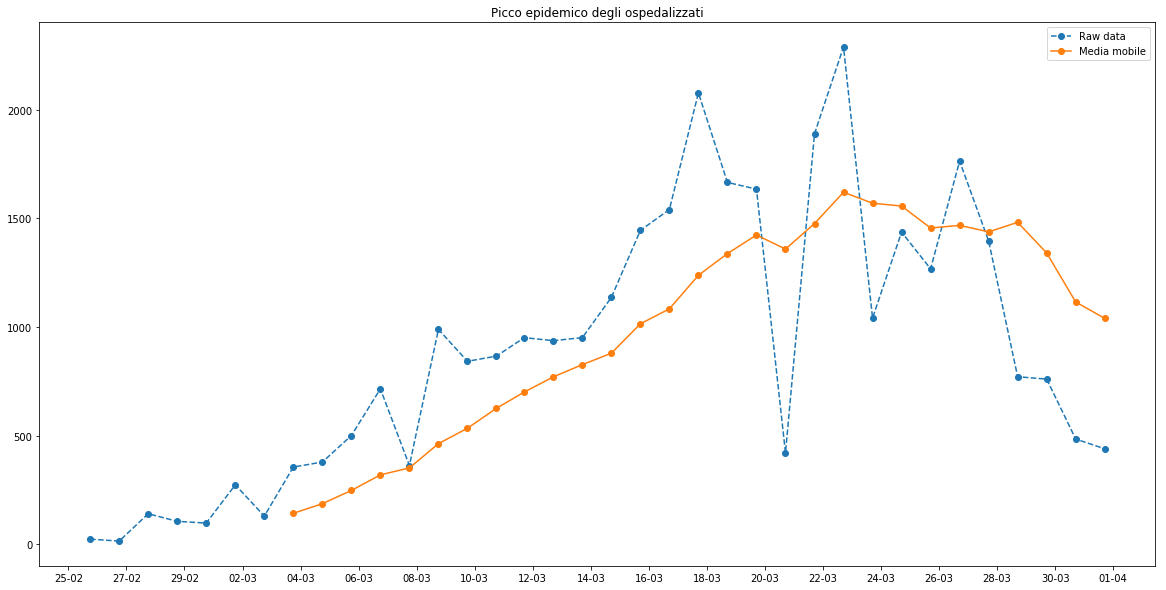

In [8]:
plotIncrements(ds, 'totale_ospedalizzati', 'Picco epidemico degli ospedalizzati', 8)

# Toscana

In [9]:
fileUrl = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv"
ds = pd.read_csv(fileUrl)
regione = "Toscana"

sds = ds[ds['denominazione_regione'] == regione].copy()

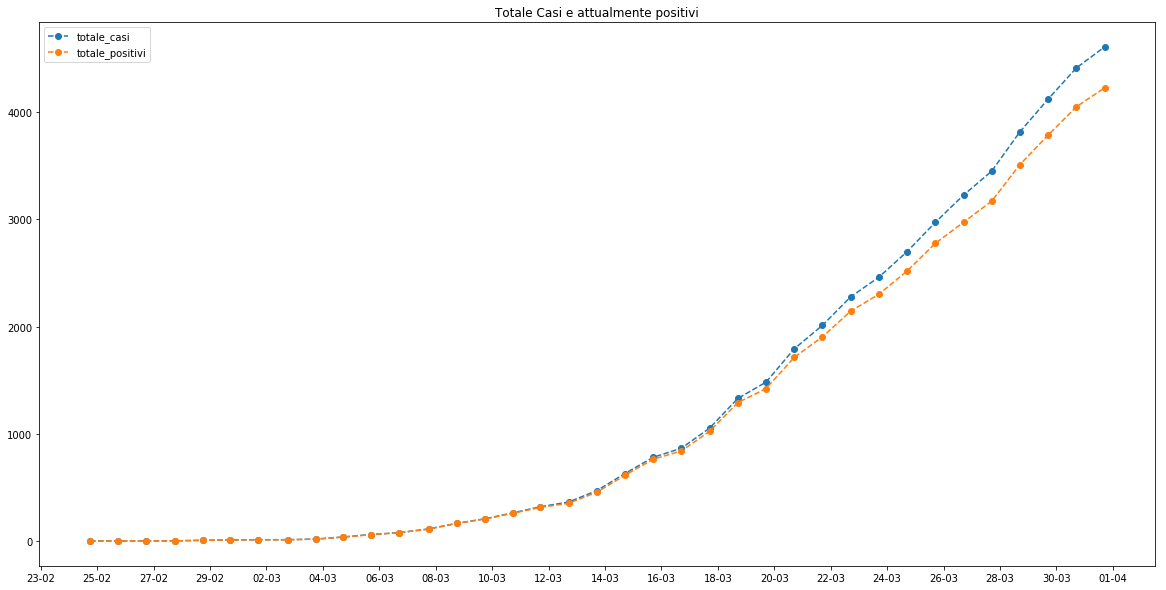

In [10]:
plotVals(sds, 'totale_casi', 'totale_positivi', title='Totale Casi e attualmente positivi')

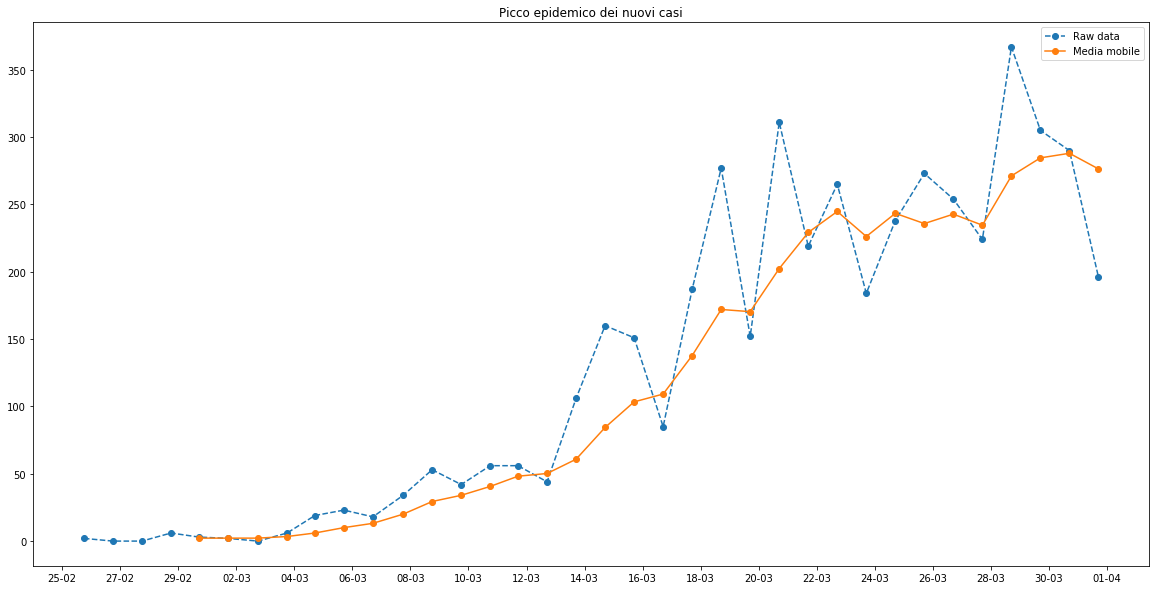

In [11]:
plotIncrements(sds, 'totale_casi', 'Picco epidemico dei nuovi casi')   

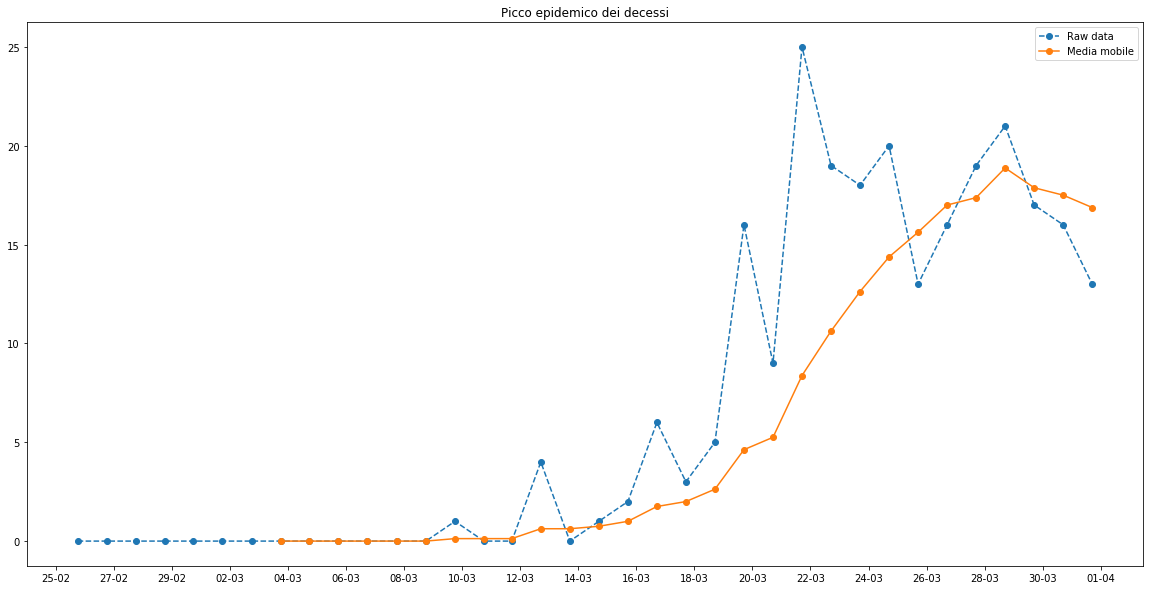

In [12]:
plotIncrements(sds, 'deceduti', 'Picco epidemico dei decessi', 8)

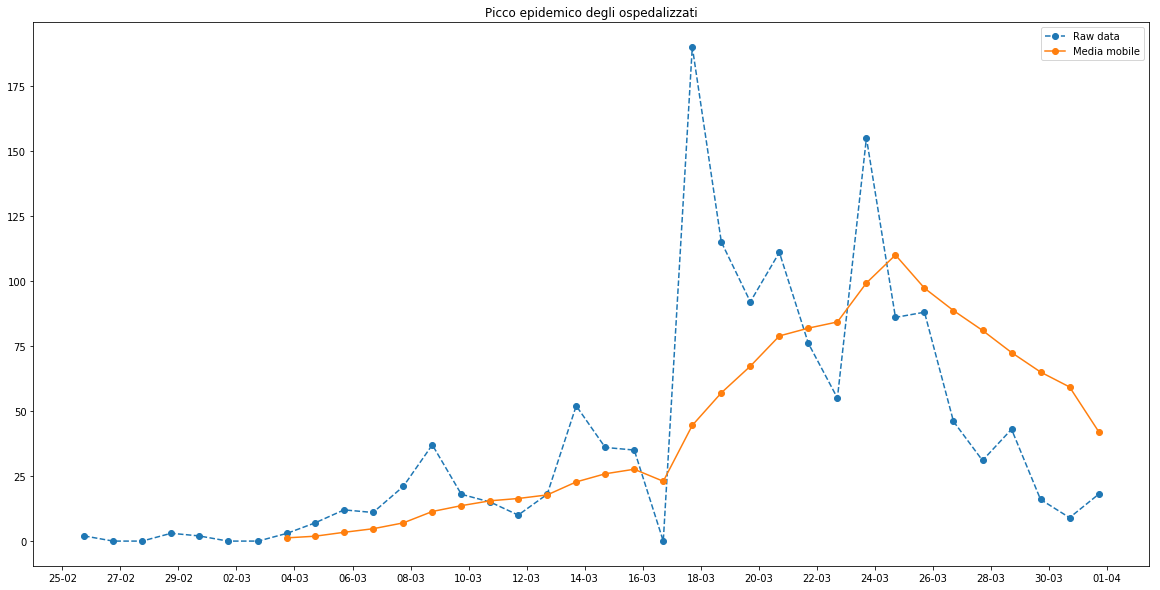

In [13]:
plotIncrements(sds, 'totale_ospedalizzati', 'Picco epidemico degli ospedalizzati', 8)

# Pisa

In [14]:
fileUrl = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv"
ds = pd.read_csv(fileUrl)
provincia = "Pisa"
sds = ds[ds['denominazione_provincia'] == provincia].copy()

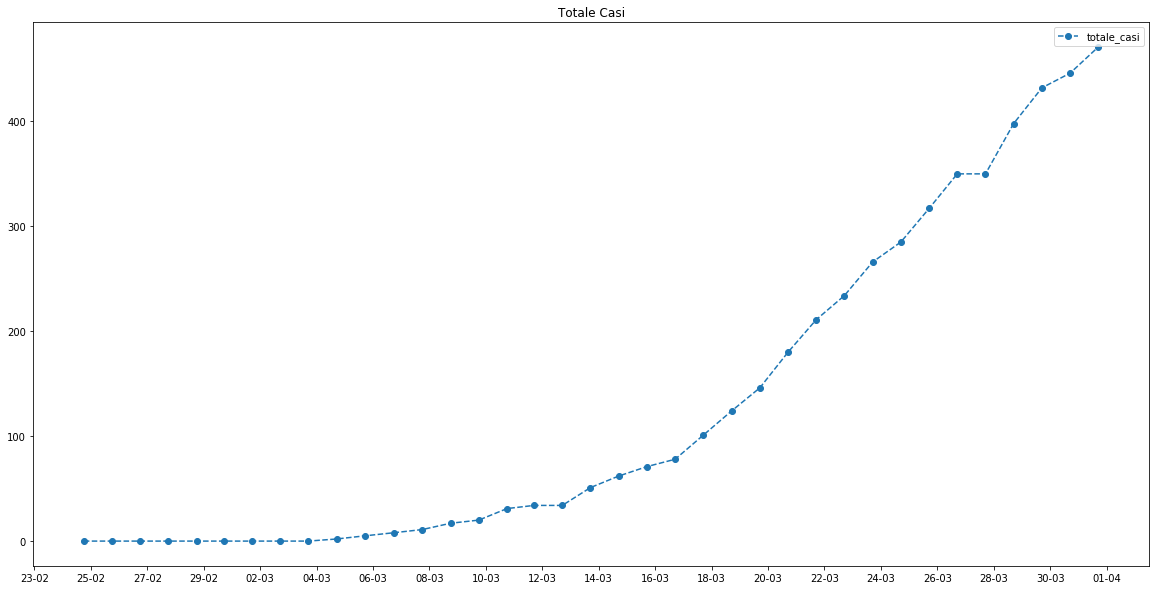

In [15]:
plotVals(sds, 'totale_casi', title='Totale Casi')

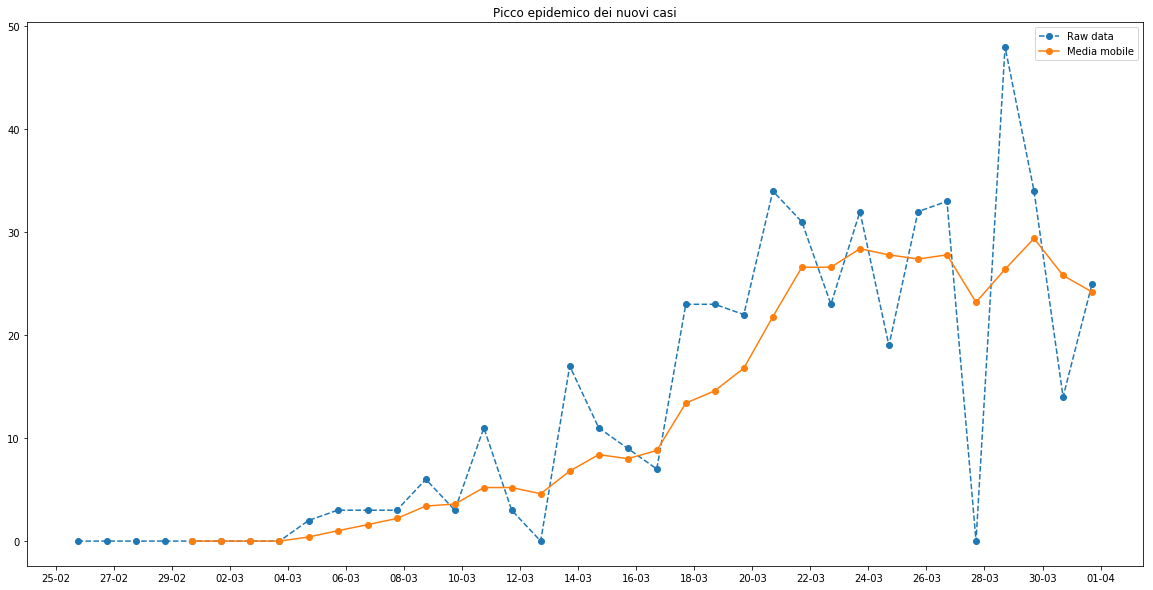

In [16]:
plotIncrements(sds, 'totale_casi', 'Picco epidemico dei nuovi casi')   

## Picco epidemico e picco dei casi
Esistono due tipi di picchi: il picco epidemico e il picco dei casi. Il picco epidemico è il momento in cui il numero di nuovi infetti rilevati giornaliero è massimo (i nuovi positivi),
il picco di casi è il momento in cui il numero di casi in circolazione (gli attualmente positivi) è massimo, prima di iniziare a scendere.

Per i matematici, nel picco epidemico la derivata è massima, nel picco di casi da positiva diventa negativa.
Spieghiamola immaginando un disegnino: la curva sale veloce, poi rallenta (il picco epidemico) e arriva piano piano a un massimo (il picco di casi); poi scende.

In secondo luogo, ogni indicatore non cumulativo ha i suoi due picchi. Ovvero c'è un picco epidemico e un picco di casi degli infetti rilevati, un picco epidemico e un picco di casi
degli ospedalizzati in terapia intensiva, un picco epidemico e un picco di casi degli asintomatici, eccetera. Tutti in momenti diversi, legati tra loro:
se il picco epidemico dei positivi è in una certa data, il picco epidemico dei ricoveri è pochi giorni dopo e quello dei decessi è ancora successivo.